# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Introduction:-The-Reactions" data-toc-modified-id="Introduction:-The-Reactions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction: The Reactions</a></div><div class="lev1 toc-item"><a href="#ODEs" data-toc-modified-id="ODEs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ODEs</a></div><div class="lev2 toc-item"><a href="#ODEs-based-on-rate-constants" data-toc-modified-id="ODEs-based-on-rate-constants-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>ODEs based on rate constants</a></div><div class="lev2 toc-item"><a href="#ODEs-based-on-Coupled-Reaction-Theorem" data-toc-modified-id="ODEs-based-on-Coupled-Reaction-Theorem-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>ODEs based on Coupled Reaction Theorem</a></div><div class="lev1 toc-item"><a href="#Global-Parameters" data-toc-modified-id="Global-Parameters-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Global Parameters</a></div><div class="lev1 toc-item"><a href="#Mass-Action-Dynamics-of-Enzyme-Catalyzed-Reactions-using-Rate-Constants" data-toc-modified-id="Mass-Action-Dynamics-of-Enzyme-Catalyzed-Reactions-using-Rate-Constants-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mass Action Dynamics of Enzyme Catalyzed Reactions using Rate Constants</a></div><div class="lev2 toc-item"><a href="#ODE-Implementation" data-toc-modified-id="ODE-Implementation-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>ODE Implementation</a></div><div class="lev2 toc-item"><a href="#Run-simulation" data-toc-modified-id="Run-simulation-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Run simulation</a></div><div class="lev1 toc-item"><a href="#ODE-of-Mass-Action-Dynamics-of-Enzyme-Catalyzed-Reactions-using-Coupled-Reaction-Theorem" data-toc-modified-id="ODE-of-Mass-Action-Dynamics-of-Enzyme-Catalyzed-Reactions-using-Coupled-Reaction-Theorem-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>ODE of Mass Action Dynamics of Enzyme Catalyzed Reactions using Coupled Reaction Theorem</a></div><div class="lev2 toc-item"><a href="#ODE-Implementation" data-toc-modified-id="ODE-Implementation-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>ODE Implementation</a></div><div class="lev2 toc-item"><a href="#Run-simulation" data-toc-modified-id="Run-simulation-52"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Run simulation</a></div><div class="lev1 toc-item"><a href="#ODE-of-Summary-Reactions-using-the-Coupled-Reaction-Theorem" data-toc-modified-id="ODE-of-Summary-Reactions-using-the-Coupled-Reaction-Theorem-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ODE of Summary Reactions using the Coupled Reaction Theorem</a></div><div class="lev2 toc-item"><a href="#ODE-Formulation" data-toc-modified-id="ODE-Formulation-61"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>ODE Formulation</a></div><div class="lev2 toc-item"><a href="#Run-simulation" data-toc-modified-id="Run-simulation-62"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Run simulation</a></div><div class="lev1 toc-item"><a href="#Figures-3A-3C" data-toc-modified-id="Figures-3A-3C-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Figures 3A-3C</a></div><div class="lev1 toc-item"><a href="#Figure-3D" data-toc-modified-id="Figure-3D-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Figure 3D</a></div><div class="lev1 toc-item"><a href="#References" data-toc-modified-id="References-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>References</a></div>

# Introduction: The Reactions

This notebook describes the deterministic simulations of the reaction scheme shown in Figure 2 
of the manscript, which is reproduced below for convenience. The notebook can be run as a Jupyter 
notebook with a Matlab kernel, or the Matlab code can be
cut and pasted into .m files for direct use with Matlab. For use within a Jupyter notebook, see 
https://github.com/Calysto/matlab_kernel or 
https://anneurai.net/2015/11/12/matlab-based-ipython-notebooks/.


<img src="reaction_pathway2.png">

The numbers labeling the reactions are the indices used to indicate which reaction is being discussed. 
For example, the rate constant for reaction +2 and -2 are respectively, $k_{2}$ and $k_{-2}$. 

# ODEs

## ODEs based on rate constants

In [95]:
%%latex
The ordinary differential equations (ODEs) used in the simulation based on rate parameters are as follows:

\begin{align}
\frac{d[A]}{dt} & = & 0 \\

\frac{d[E1:A]}{dt} & = & k_2 [E1][A] - k_{-2}[E1:A] - k_3[E1:A] + k_{-3} [E1:B] \\

\frac{d[E1:B]}{dt} & = & k_3[E1:A] - k_{-3}[E1:B] - k_4[E1:B] + k_{-4}[E1][B] \\

\frac{d[B]}{dt} & = & k_4[E1:B] - k_{-4}[E1][B] - k_6[B][E2] + k_{-6}[E2:B] \\ 

\frac{d[E1]}{dt} & = & = -k_2[A][E1] + k_{-2}[E1:A] + k_4[E1:B] - k_{-4}[E1][B] \\


\frac{d[E2:B]}{dt} & = & k_6[E2][B] - k_{-6}[E2:B] - k_7[E2:B] + k_{-7}[E2:C] \\

\frac{d[E2:C]}{dt} & = &  k_7[E2:B] - k_{-7}[E2:C] - k_8[E2:C] + k_{-8}[E2][C] \\

\frac{d[E2]}{dt} & = & -k6[B][E2] + k_6[E2:B] + k8[E2:C] - k_8[E2][C] \\

\frac{d[C]}{dt} & = & 0 \\
\end{align}

<IPython.core.display.Latex object>

## ODEs based on Coupled Reaction Theorem

In [96]:
%%latex
The ODE's used to simulation the time dependence of the same species using an implemention of the 
coupled reaction theorem are defined below. In these equations the coupling terms between 
reactions are identified, for example, as $c_{3,2}$ where 'c' indicates a coupling term, '3' represents 
the second reaction in the sequence and '2' represents the reaction reaction that all others are being
compared to. The coupling terms are given numerical values according to Eqn 21 in the main 
article and are set in Section 5 below.  

\begin{eqnarray}
\frac{d[A]}{dt} & = & 0 \\
% E1A dynamics
\frac{d[E1:A]}{dt} & = & (1 - K_{-2}\frac{[E1:A]}{[E1][A]}) - c_{3,2}\cdot(1 - K_{-3}\frac{[E1:B]}{[E1:A]}) \\

% E1B dynamics
\frac{d[E1:B]}{dt} & = & c_{3,2}\cdot(1 - K_{-3}\frac{[E1:B]}{[E1:A]}) - c_{4,2}\cdot(1 - K_{-4}\frac{[E1][B]}{[E1:B]}) \\

% B dynamics
\frac{d[B]}{dt} & = & c_{4,2}\cdot(1  - K_{-4}\frac{[E1][B]}{[E1:B]}) - c_{6,2} \cdot (1 - K_{-6}\frac{[E2:B]}{[E2][B]}) \\

% E1 dynamics
\frac{d[E1]}{dt} & = & -(1 - K_{-2}\frac{[E1:A]}{[A][E1]}) + c_{4,2}\cdot(1 - K_{-4}\frac{[E1][B]}{[E1:B]}) \\

% E2B complex dynamics
\frac{d[E2:B]}{dt} & = & c_{6,2}\cdot(1 - K_{-6}\frac{[E2:B]}{[E2][B]}) - c_{7,2}\cdot(1 - K_{-7}\frac{[E2:C]}{[E2:B]}) \\

% E2C complex dynamics
\frac{d[E2:C]}{dt} & = & c_{7,2}\cdot(1 - K_{-7}\frac{[E2:C]}{[E2:B]}) - c_{8,2}\cdot(1 - K_{-8}\frac{[E2][C]}{[E2:C]}) \\

% E2 dynamics
\frac{d[E2]}{dt} & = & -c_{6,2}\cdot(1 - K_{-6}\frac{[E2:B]}{[B][E2]}) + c_{8,2}\cdot(1 - K_{-8}\frac{[E2][C]}{[E2:C]} \\

\frac{d[C]}{dt} & = & 0 \\
\end{eqnarray}

<IPython.core.display.Latex object>

# Global Parameters

First, set some global parameters:

In [97]:
font_size = 12;
line_width = 2.00;
RT = 2.477572; % kJ/mol

% Equilibrium constant for the summary reaction A ==> C:
K_overall = 100;
% Uncomment the line below to reproduce Figure 3D in the manuscript
%K_overall = 1;
factor = 0.02;
K1 = factor*sqrt(K_overall);
K5 = (1/factor)*sqrt(K_overall);

In [98]:
%%latex
Set parameters for the first set of reactions involving enzyme E1,
\begin{eqnarray}
A + E1 & \Leftrightarrow & AE1 & \Leftrightarrow & BE1 & \Leftrightarrow B + E1. &
\end{eqnarray}

<IPython.core.display.Latex object>

In [99]:
% Parameters 
% K denotes an equilibrium constant
% K1 denotes the equilibrium constant for the first reaction
% K1_ denotes the equilibrium constant for reaction 1 in reverse
% Thus, K_2 denotes equilibrium constant for the first catalyzed reaction in reverse, A + E <== EA
% K2 denotes equilibrium constant for the first catalyzed forward reaction, A + E ==> EA
K2 = 1e6;
K_2 = 1/K2;
K4 = 1e-6;
K_4 = 1/K4;
K3 = K1/(K2*K4);
K_3 = 1/K3;
DG2 = -RT*log(K2);
DG3 = -RT*log(K3);
DG4 = -RT*log(K4);

% Next, set the kinetic/mass action rate constants for these same reactions.
% rate constants are denoted by lower case 'k'
k2 = 1e9;
k_2 = k2/K2;
k_4 = 1e9;
k4 = k_4 *K4;
k3 = 1e3;
k_3 = k3/K3;

In [100]:
%%latex
Set parameters for the second set of reactions involving enzyme E2,

\begin{eqnarray}
B + E2 & \Leftrightarrow & BE2 & \Leftrightarrow & CE2 & \Leftrightarrow C + E2. &
\end{eqnarray}

<IPython.core.display.Latex object>

In [101]:
% Reaction parameters for the second set of catalyzed reactions:
K6 = 1e6;
K_6 = 1/K6;
K8 = 1e-6;
K_8 = 1/K8;
K7 = K5/(K6*K8);
K_7 = 1/K7;
DG6 = -RT*log(K6);
DG7 = -RT*log(K7);
DG8 = -RT*log(K8);

k6 = 1e9;
k_6 = k6/K6;
%k8 = 1e3;
%k_8 = k8/K8;
k_8 = 1e9;
k8 = k_8 *K8;
k7 = 1e3;
k_7 = k7/K7;

Set the initial concentrations and the range of integration:

In [102]:
A0 = 1e-3;
C0 = 1.4373e-25;
% Uncomment the line below to reproduce Figure 3D in the manuscript
% C0 = 1.4373e-9;
E10= 0.5e-3;
E20= 0.5e-3;
options = [];
initial_concentrations = [A0 0 0 0 E10 0 0 C0 E20];
timespan = [0,10];

# Mass Action Dynamics of Enzyme Catalyzed Reactions using Rate Constants

## ODE Implementation


This section provides the code for the usual differential equation describing the dynamics of each 
chemical species according to the law of mass action in which rate constants are used. The ODE is provided 
next, and the subroutine containing the ODE is called by a solver. However, 
a matlab subroutine can't be defined within a Jupyter notebook (that I know of). 
To run the notebook, the code below needs to be cut and pasted into a matlab file, coupledenzymefunc.m, 
in the directory that you run the notebook.

In [103]:
%{
function dydt = coupledenzymefunc(t,y,k2,k_2,k3,k_3,k4,k_4,k6,k_6,k7,k_7,k8,k_8)

A = y(1);
E1A = y(2);
E1B = y(3);
B=y(4);
E1 = y(5);

E2B = y(6);
E2C = y(7);
C=y(8);
E2 = y(9);

dydt = zeros(9,1);

% initial reaction:
dydt(1) = 0;                                            % species A
dydt(2) = k2 *E1*A - k_2*E1A - k3 *E1A + k_3 *E1B; % species E1A
dydt(3) = k3*E1A - k_3 *E1B - k4*E1B + k_4*E1*B;   % species E1B
dydt(4) = k4*E1B - k_4 *E1*B - k6*B*E2 + k_6*E2B; % species B
dydt(5) = -k2*A*E1 + k_2*E1A + k4*E1B - k_4 *E1*B;% species E1

dydt(6) = k6 *E2*B - k_6*E2B - k7 *E2B + k_7 *E2C; % species E2B
dydt(7) = k7*E2B - k_7 *E2C - k8*E2C + k_8*E2*C;   % species E2C
% final reaction:
dydt(8) = 0;                                            % species C
dydt(9) = -k6*B*E2 + k_6*E2B + k8*E2C - k_8 *E2*C;% species E2
%}

## Run simulation

Run the simulation using the stiff solver ode23tb \cite{Hosea1996}:

In [104]:
time = cputime;
[t_kin,y] = ode23tb(@coupledenzymefunc_distribute, timespan,[A0 0 0 0 E10 0 0 C0 E20], ...
options, k2, k_2, k3, k_3, k4, k_4, k6, k_6, k7, k_7, k8,k_8);

Convert the results into appropriately named variables that correspond with Figure 2 in the manuscript:

In [105]:
A_kin = y(:,1);
E1A_kin = y(:,2);
E1B_kin = y(:,3);
B_kin = y(:,4);
E1_kin = y(:,5);

B_kin = B_kin;
E2B_kin = y(:,6);
E2C_kin = y(:,7);
C_kin = y(:,8);
E2_kin = y(:,9);

Display the results of the simulation at the bottom of the notebook.

# ODE of Mass Action Dynamics of Enzyme Catalyzed Reactions using Coupled Reaction Theorem

First, the coupling terms need to be calculated from the steady state observations of counts or 
concentrations. These are taken from the previous simulation above.
Also, since the thermodynamic formulation is a deterministic formulation, the initial concentrations can't have
zeros like the initial concentrations for the simulation above. Instead, set each initial concentration to the minimum
observed value above. 

In [106]:
A_ss = A_kin(end);
E1A_ss = E1A_kin(end);
E1B_ss = E1B_kin(end);
B_ss = B_kin(end);
E1_ss = E1_kin(end);

B_ss = B_ss;
E2B_ss = E2B_kin(end);
E2C_ss = E2C_kin(end);
C_ss = C_kin(end);
E2_ss = E2_kin(end);

% Initial conditions for the use of the coupled reaction theorem method. 
% Must have concentrations > 0:
A_init = max(A_kin(find(A_kin > 0)));
E1A_init = min(E1A_kin(find(E1A_kin > 0)));
E1B_init = min(E1B_kin(find(E1B_kin > 0)));
B_init = min(B_kin(find(B_kin > 0)));
E1_init = max(E1_kin(find(E1_kin > 0)));

B_init = B_init;
E2B_init = min(E2B_kin(find(E2B_kin > 0)));
E2C_init = min(E2C_kin(find(E2C_kin > 0)));
C_init = min(C_kin(find(C_kin > 0)));
E2_init = max(E2_kin(find(E2_kin > 0)));

% Steady State Coupling terms:
%p(2)/p(1):
c32_ss = (1-K_2*E1A_ss/(E1_ss*A_ss)) / (1-K_3*E1B_ss/E1A_ss);
%p(3)/p(1):
c42_ss = c32_ss*(1-K_3*E1B_ss/E1A_ss) / (1 - K_4*E1_ss*B_ss/E1B_ss);
% p(4)/p(1):
c62_ss = c42_ss*(1 - K_4*E1_ss*B_ss/E1B_ss) / (1 - K_6*E2B_ss/(B_ss*E2_ss));
% p(5)/p(1):
c72_ss = c62_ss*(1 - K_6*(E2B_ss)/(B_ss*E2_ss)) / (1-K_7*E2C_ss/E2B_ss);
% p(6)/p(1):
c82_ss = c72_ss * (1-K_7*E2C_ss/E2B_ss) / (1 - K_8*E2_ss*C_ss/E2C_ss);

% Calculate the coupling constants, K (eg., K_{12} main manuscript Eqn 19:
K32 = c32_ss * 1/E1A_ss          * A_ss/1 * E1_ss/1;
K42 = c42_ss * 1/E1B_ss          * A_ss/1 * E1_ss/1;

K62 = c62_ss * 1/B_ss * 1/E2_ss * A_ss/1 * E1_ss/1;
K72 = c72_ss * 1/E2B_ss          * A_ss/1 * E1_ss/1;
K82 = c82_ss * 1/E2C_ss          * A_ss/1 * E1_ss/1;

conc_ss = [A_ss E1A_ss E1B_ss B_ss E1_ss E2B_ss E2C_ss C_ss E2_ss];
conc_init = [A_init E1A_init E1B_init B_init E1_init E2B_init E2C_init C_init E2_init];
coupling_constant = [K32 K42 K62 K72 K82];
equi_const = [K2 K3 K4 K6 K7 K8];
% if using CRT such that timespan = t_kin, then MUST multiply dydt by p(1) = k2*E1*A!
% That is, if using full CRT with no multiplication of dydt by p(1), then the algorithm must 
% select its own timepoints!

## ODE Implementation


This section provides the code for the differential equation describing the dynamics of each 
chemical species according to the law of mass action in which equilibrium constants are used. The ODE 
is provided next, and the subroutine containing the ODE is called by the same solver as used above. 
Again, a matlab subroutine can't be defined within a Jupyter notebook, so the code below needs to be 
cut and pasted into a matlab file, coupledenzymefunc_crt.m, in the directory that you run the notebook.

In [107]:
%{
function dydt = coupledenzymefunc_crt(t,y,equi_const,k1, concs_ss, coupling_ss, rescale)
K2 = equi_const(1);
K3 = equi_const(2);
K4 = equi_const(3);

K6 = equi_const(4);
K7 = equi_const(5);
K8 = equi_const(6);

K_2 = 1/K2;
K_3 = 1/K3;
K_4 = 1/K4;

K_6 = 1/K6;
K_7 = 1/K7;
K_8 = 1/K8;

A = y(1) ;
E1A = y(2) ;
E1B = y(3) ;
B = y(4) ;
E1 = y(5);

B = B;
E2B = y(6) ;
E2C = y(7) ;
C = y(8) ;
E2 = y(9);

dydt = zeros(9,1);

c11 = k1*A*E1;
A_ss = concs_ss(1);
E1A_ss = concs_ss(2);
E1B_ss = concs_ss(3);
B_ss = concs_ss(4);
E1_ss = concs_ss(5);

E2B_ss = concs_ss(6);
E2C_ss = concs_ss(7);
C_ss = concs_ss(8);
E2_ss = concs_ss(9);

% Calculate the coupling terms from the couping constants:
c32 = coupling_ss(1) * E1A/1          * 1/A * 1/E1;
c42 = coupling_ss(2) * E1B/1          * 1/A * 1/E1;

c62 = coupling_ss(3) * B/1 * E2/1 * 1/A * 1/E1;
c72 = coupling_ss(4) * E2B/1          * 1/A * 1/E1;
c82 = coupling_ss(5) * E2C/1          * 1/A * 1/E1;

%Enzymatic Reaction 1:
dydt(1) = 0;

% E1A dynamics
   dydt(2) = (1 - K_2*E1A/(E1*A)) - c32*(1 - K_3*E1B/E1A);

% E1B dynamics
   dydt(3) = c32*(1 - K_3*E1B/E1A) - c42*(1 - K_4*E1*B/E1B);

% B dynamics
   dydt(4) = c42*(1  - K_4*E1*B/E1B) - c62 * (1 - K_6 * E2B/(E2*B));

% E1 dynamics
   dydt(5) = -(1 - K_2*E1A/(A*E1)) + c42*(1 - K_4*E1*B/E1B);

%Enzymatic Reaction 2:
% The dynamics of the substrate (B) of enzymatic reaction 2 are addressed in the equation for the product dynamics of Enzyme reaction 1 above.

% E2B complex dynamics
   dydt(6) = c62*(1 - K_6*E2B/(E2*B)) - c72*(1 - K_7*E2C/E2B);

% E2C complex dynamics
   dydt(7) = c72*(1 - K_7*E2C/E2B) - c82*(1 - K_8*E2*C/E2C);

% C dynamics
dydt(8) = 0;

% E2 dynamics
   dydt(9) = -c62*(1 - K_6*E2B/(B*E2)) + c82*(1 - K_8*E2*C/E2C);

if(rescale == 0)
   dydt = c11 * dydt;
end;
%}

## Run simulation


Now run the simulation using the same stiff solver:

In [108]:
rescale = 1;
time = cputime;
[t,y] = ode23tb(@coupledenzymefunc_crt_distribute, timespan, conc_init, options, equi_const, ...
k2, conc_ss, coupling_constant,rescale);


Convert the results into appropriately named variables that correspond with Figure 2 in the manuscript:

In [109]:
t_length = length(t);
t_kin_length = length(t_kin);

A = y(:,1);
E1A = y(:,2);
E1B = y(:,3);
B = y(:,4);
E1 = y(:,5);
E2B = y(:,6);
E2C = y(:,7);
C = y(:,8);
E2 = y(:,9);

# ODE of Summary Reactions using the Coupled Reaction Theorem

## ODE Formulation


This section provides the code for the differential equation describing the dynamics of the summary 
reactions involving only species A, B, and C according to the law of mass action in which equilibrium 
constants are used. 

In [110]:
c21ss = (1 - 1/(K_2*K_3*K_4)*B_ss/A_ss) / (1 - (K_8*K_7*K_6)*C_ss/B_ss);
K21 = c21ss * 1/B_ss * A_ss/1;

The ODE is provided 
next, and the subroutine containing the ODE is called by the same solver as used above. Again, 
a matlab subroutine can't be defined within a Jupyter notebook, so the code below needs to be 
cut and pasted into a matlab file, coupledrxnfun_crt_distribute.m, in the directory that you run 
the notebook.

In [111]:
%{
function dydt = coupledrxnfun_crt_distribute(t,y,equi_const,k1, concs_ss, K21)

K2 = equi_const(1);
K3 = equi_const(2);
K4 = equi_const(3);
K6 = equi_const(4);
K7 = equi_const(5);
K8 = equi_const(6);

K_2 = 1/K2;
K_3 = 1/K3;
K3_a = 1/K4;

K_6 = 1/K6;
K_7 = 1/K7;
K_8 = 1/K8;

A = y(1) ;
B = y(4) ;
C = y(8) ;

dydt = zeros(9,1);

E1_ss = concs_ss(5);

dydt(1) = 0;

dydt(4) = (1 - K_2*K_3*K3_a*B/A) - (K21*B/A)*(1 - K_6*K_7*K_8*C/B);

dydt(8) = 0;
% The absolute rate is recovered by just knowing one rate constant and, in this case, 
% the steady state concentration of the E1 enzyme:
dydt = dydt * k1*A*E1_ss;
%}

## Run simulation

In [112]:
[t_crt,y_crt] = ode23tb(@coupledrxnfunc_crt_distribute, timespan,conc_init, ...
options, equi_const, k2, conc_ss, K21);


Convert the results into appropriately named variables that correspond with Figure 2 in the manuscript:

In [113]:
A_crt = y_crt(:,1);
B_crt = y_crt(:,4);
C_crt = y_crt(:,8);

# Figures 3A-3C

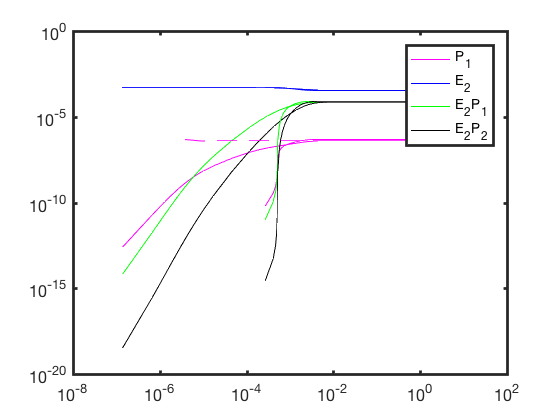

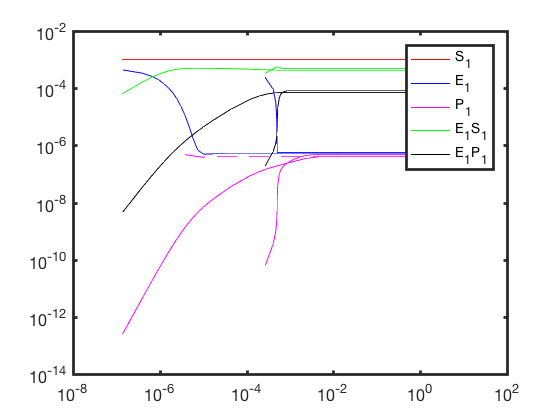

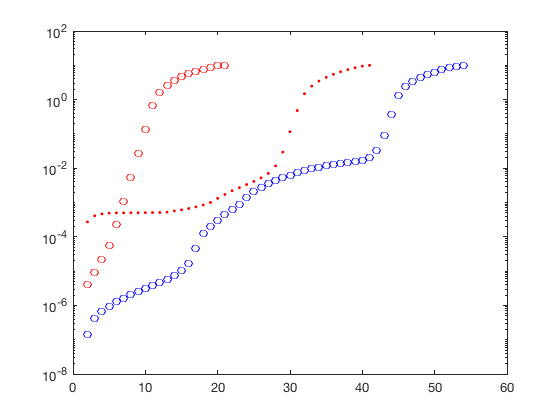

In [114]:
% Figure 3C:
figure;
semilogy([1:1:t_kin_length], t_kin, 'bo', [1:1:t_length], t, 'r.',1:1:length(t_crt), t_crt,'ro');


% Figure 3A:
figure1 = figure;
axes1 = axes('Parent',figure1,'YScale','log','YMinorTick','off',...
    'XScale','log',...
    'XMinorTick','off',...
    'LineWidth',line_width,...
    'FontWeight','normal',...
    'FontSize',font_size,...
    'FontName','Helvetica');
box(axes1,'on');
hold(axes1,'all');
loglog(t_kin,A_kin,'r-',t_kin,E1_kin,'b-', t_kin, B_kin, 'm-', t_kin, E1A_kin, 'g-', t_kin, E1B_kin, 'k-');
legend('S_1', 'E_1', 'P_1', 'E_{1}S_{1}', 'E_{1}P_{1}');
%legend('boxoff');
loglog(t,A,'r-',t,E1,'b-', t, B, 'm-', t, E1A, 'g-', t, E1B, 'k-');
loglog(t_crt, B_crt, 'm--');
%loglog(t,A,'r:',t,E1,'b:', t, B, 'm:', t, E1A, 'g:', t, E1B, 'k:', t_crt, B_crt, 'm:');

% Figure 3B:
figure2 = figure;
axes2 = axes('Parent',figure2,'YScale','log','YMinorTick','off',...
    'XScale','log',...
    'XMinorTick','off',...
    'LineWidth',line_width,...
    'FontWeight','normal',...
    'FontSize',font_size,...
    'FontName','Helvetica');
box(axes2,'on');
hold(axes2,'all');
loglog(t_kin,B_kin,'m-',t_kin,E2_kin,'b-', t_kin, E2B_kin, 'g-', t_kin, E2C_kin, 'k-');
legend('P_{1}', 'E_{2}', 'E_{2}P_{1}', 'E_{2}P_{2}');
loglog(t,B,'m',t,E2,'b', t, E2B, 'g-', t, E2C, 'k-');
loglog(t_crt, B_crt, 'm--');

# Figure 3D 


In manuscript, the initial conditions for the simulations are different from those used for Figures 
3A-C because otherwise the lines on the plot will be on vastly different scales and subsequently do not 
make a concise graphic. To generate the actual Figure 3D in the manuscript, set the initial conditions
at the top of the notebood to $K_{overall} = 1.0$ and $[C] = 1.4373-09$. This will bring all lines into the 
same area on the plot.

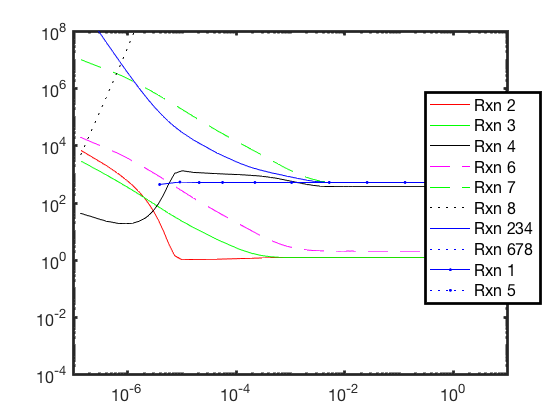

In [115]:
rel_flux1a_kin = K2 *(E1_kin.*A_kin)./E1A_kin;
rel_flux2a_kin = K3*E1A_kin./E1B_kin;
rel_flux3a_kin = K4*E1B_kin./(E1_kin.*B_kin);
rel_flux1b_kin = K6 *(E2_kin.*B_kin)./E2B_kin;
rel_flux2b_kin = K7*E2B_kin./E2C_kin;
rel_flux3b_kin = K8*E2C_kin./(E2_kin.*C_kin);

net_flux_crt1 = 1 ./(1 + (1/K1) *B_crt./A_crt) ;
net_flux_crt2 = 1  ./ (1 + (1/K5) *C_crt./B_crt);
rel_flux1_crt = K1 *A_crt./B_crt ;
rel_flux2_crt =  K5*B_crt./C_crt;

% Figure 3D
% In manuscript, the initial conditions are K = 1 and [C] = 1.4373-09 simply to bring all 
% lines into the same area
figure4 = figure;
axes4 = axes('Parent',figure4,'YScale','log','YMinorTick','on',...
    'YLim',[1.0e-4, 1.0e+08],...
    'XScale','log',...
    'XMinorTick','on',...
    'XLim',[1.0e-7, 1.0e+01],...
    'LineWidth',line_width,...
    'FontWeight','normal',...
    'FontSize',font_size,...
    'FontName','Helvetica');
box(axes4,'on');
hold(axes4,'all');
% kinetic simulation:
loglog1 = loglog(t_kin, rel_flux1a_kin, 'r-', t_kin, rel_flux2a_kin, 'g-', t_kin, rel_flux3a_kin, 'k-');
loglog2 = loglog(t_kin, rel_flux1b_kin, 'm--', t_kin, rel_flux2b_kin, 'g--', t_kin, rel_flux3b_kin, 'k--');

% Kinetic composite reactions
loglog3 = loglog(t_kin, rel_flux1a_kin.*rel_flux2a_kin.*rel_flux3a_kin, 'b-');
loglog4 = loglog(t_kin, rel_flux1b_kin.*rel_flux2b_kin.*rel_flux3b_kin, 'b--');

% Reaction 678 in figure 3D
loglog5 = loglog(t_crt, rel_flux1_crt, 'b.-');
% Reaction 8 in figure 3D
loglog6 = loglog(t_crt, rel_flux2_crt, 'b.--');

set(loglog1(1),'DisplayName','Rxn 2','Color',[1 0 0]);
set(loglog1(2),'DisplayName','Rxn 3','Color',[0 1 0]);
set(loglog1(3),'DisplayName','Rxn 4','Color',[0 0 0]);
set(loglog2(1),'DisplayName','Rxn 6','LineStyle','--','Color',[1 0 1]);
set(loglog2(2),'DisplayName','Rxn 7','LineStyle','--','Color',[0 1 0]);
set(loglog2(3),'DisplayName','Rxn 8','LineStyle',':','Color',[0 0 0]);
set(loglog3(1),'DisplayName','Rxn 234','Color',[0 0 1],'LineWidth',0.5);
set(loglog4(1),'DisplayName','Rxn 678','LineStyle',':','Color',[0 0 1],'LineWidth',0.5);
set(loglog5(1),'DisplayName','Rxn 1');
set(loglog6(1),'DisplayName','Rxn 5','LineStyle',':');

% Uncomment the following line to preserve the X-limits of the axes
xlim(axes4,[1e-07 10]);
ylim(axes4,[1.0e-4, 1.0e+08]);
% Create legend
legend1 = legend(axes4,'show');
set(legend1,...
    'Position',[0.818135165789346 0.337951852382506 0.0878938049595933 0.382969768608066],...
    'FontSize',12,...
    'EdgeColor',[0 0 0]);


# References

[<a id="cit-Hosea1996" href="#call-Hosea1996">1</a>] Hosea M. E. and Shampine L. F., ``_Analysis and implementation of TR-BDF2_'', Applied Numerical Mathematics, vol. 20, number 1-2, pp. 21-37,  1996.  [online](<Go to ISI>://WOS:A1996UF18400003)

